In [ ]:
!pip install mario-gpt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.7/983.7 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 51.1 MB/s eta 0:00:00


## Imports

In [ ]:
import torch
from mario_gpt import MarioDataset, MarioLM
from mario_gpt.utils import view_level, convert_level_to_png

## Creating Model and attaching to GPU

In [ ]:
mario_lm = MarioLM()

Using shyamsn97/Mario-GPT2-700-context-length model


/usr/local/lib/python3.8/dist-packages/transformers/models/auto/modeling_auto.py:1248: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


Using shyamsn97/Mario-GPT2-700-context-length tokenizer


In [ ]:
device = torch.device('cuda')
mario_lm = mario_lm.to(device)

## Generating Levels

### Parameters

In [ ]:
prompts = ["many pipes, many enemies, some blocks, high elevation"]
level_size = 1400
temperature = 2.4
use_tqdm = True

### Actual Generation

In [ ]:
# generate level of size 1400, pump temperature up to ~2.4 for more stochastic but playable levels
generated_level = mario_lm.sample(
    prompts=prompts,
    num_steps=level_size,
    temperature=temperature,
    use_tqdm=use_tqdm
)

shape: torch.Size([1, 672]), torch.Size([1, 1401]) first: 56, last: 56: 100%|██████████| 1400/1400 [00:55<00:00, 25.31it/s]
/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


## Viewing Results

### Text Representation

In [ ]:
generated_level.level

['----------------------------------------------------------------------------------------------------',
 '----------------------------------------------------------------------------------------------------',
 '------------------------------------------------XXX-------------------------------------------------',
 '-----------------------------xxx----------------[]--------------------------------------------------',
 '-------------------xxxx----xxx--x---------------[]-------------xxxxxxxxxxx----------E-E-------------',
 '------------------xx---x--xxXS---x--------------[]------------xx--QQQ?QQQ-x-------SSSSSSS-SS-xxxx---',
 '-----------------xx-----xxxEX-----x-------------<>-----------xx------------x-------------E--xx---x--',
 '----------------xx-------xXXX------x------------------------xx------E-------x--------------xx-----x-',
 '--------------xxx--------XXXXS------x---------------------xxx-----SSSSSSS----x-----------xxx-------x',
 '-Ex----------xx<>-------XXXXX--------x---------------

### Image Representation

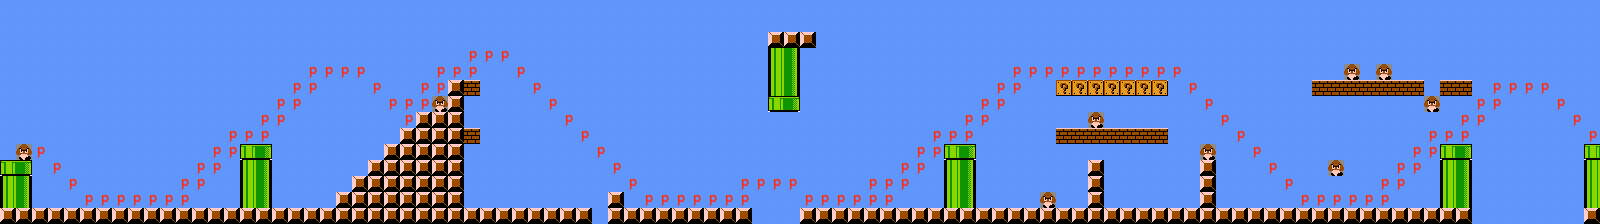

In [ ]:
generated_level.img

### Prompt

Note: Because of the stochastic nature of the model, the actual prompt description of the level may differ from what you actually used.

In [ ]:
generated_level.prompt

'some pipes, many enemies, some blocks, high elevation'